In [1]:
import os
os.chdir('D:\Codes_ML\Stock Prices Prediction Using ML')

In [2]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('NSE-TATAGLOBAL.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-11-30,216.25,220.60,216.25,217.65,218.65,1044674.0,2282.89
1,2018-11-29,217.00,220.65,213.90,218.50,218.75,2173966.0,4728.62
2,2018-11-28,217.40,221.45,215.20,215.65,216.00,977424.0,2130.79
3,2018-11-27,218.95,219.95,214.00,217.75,217.75,1863491.0,4039.51
4,2018-11-26,217.45,218.90,213.00,218.10,217.65,1452206.0,3133.20


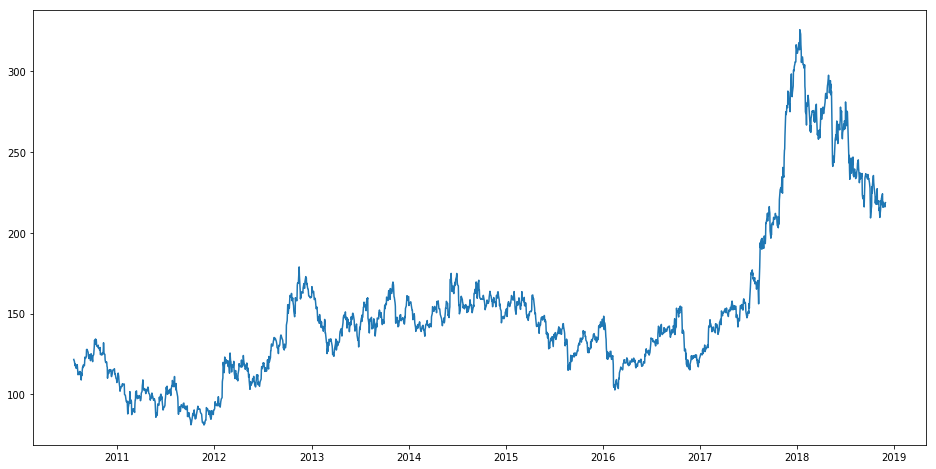

In [3]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

# Moving Average

In [4]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [5]:
#splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

In [6]:
new_data.shape, train.shape, valid.shape
((1235, 2), (987, 2), (248, 2))

((1235, 2), (987, 2), (248, 2))

In [7]:
from pandas import Timestamp

In [8]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2013-10-08 00:00:00'),
Timestamp('2017-10-06 00:00:00'),
Timestamp('2017-10-09 00:00:00'),
Timestamp('2018-10-08 00:00:00'))

(Timestamp('2013-10-08 00:00:00'),
 Timestamp('2017-10-06 00:00:00'),
 Timestamp('2017-10-09 00:00:00'),
 Timestamp('2018-10-08 00:00:00'))

In [9]:
#make predictions
preds = []
for i in range(0,248):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# Linear Regression

In [10]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [13]:
#create features
from fastai.imports import *
from fastai.structured import *
import torch
from fastai.structured import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

ImportError: cannot import name 'as_tensor'